In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.patches as patches

In [3]:
directory="/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/"
mom0='ngc7752_mom0_.fits'

In [3]:
hdul_mom0 = fits.open(directory+mom0)
data_mom0 = hdul_mom0[0].data 
header_mom0 = hdul_mom0[0].header

Select the centre and radius of the galaxy

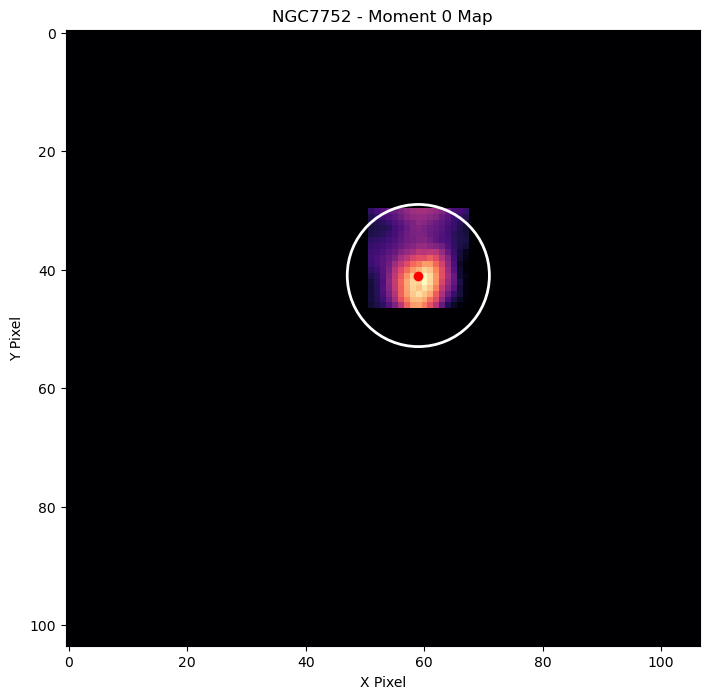

In [13]:
plt.figure(figsize=(9,8))
plt.imshow(data_mom0, cmap = "magma")
plt.plot(59,41,marker='o',color='red')
cricle = patches.Circle((59,41),radius=12, color='white', fill=False, lw=2)
plt.gca().add_patch(cricle)
plt.title('NGC7752 - Moment 0 Map')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

## New Data for NGC7753

Let's create a binary mask to islotate the gas ony of the galaxy. 

In [ ]:
data_ngc7752 = fits.getdata(directory+'ngc7752_cube.fits')
header_cube = fits.getheader(directory+'ngc7752_cube.fits') # 

In [5]:
# Create a binary mask for the circle region on each channel of the data cube

center_x, center_y = 59, 41
radius = 12

nz, ny, nx = data_ngc7752.shape
Y, X = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
mask2d = (dist_from_center <= radius).astype(int)

# Expand mask to all channels
mask3d = np.broadcast_to(mask2d, data_ngc7752.shape)

# Apply mask to isolate gas in the circle for all channels
masked_gas_cube = data_ngc7752 * mask3d


In [6]:
mom0_dat = np.nansum(masked_gas_cube,axis=0)*abs(header_cube['CDELT3'])/1000

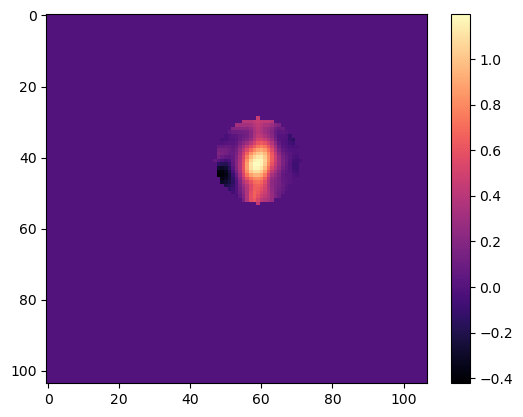

In [7]:
plt.imshow(mom0_dat, cmap='magma')
plt.colorbar()

In [23]:
hdul_new = fits.PrimaryHDU(masked_gas_cube,header=header_cube)
hdul_new.writeto(directory + 'ngc7752_cube1.fits', overwrite=True)